# Chapter 16 - Neural Networks

## Listing 16-1. Importing the data

In [1]:
import keras
import pandas as pd
from zipfile import ZipFile
import os

uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall()
csv_path = "jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)
del zip_file

df = df.drop('Date Time', axis=1)
cols = ['p',  'T', 'Tpot', 'Tdew', 'rh', 'VPmax', 'VPact', 'VPdef', 'sh', 'H2OC', 'rho', 'wv', 'mwv', 'wd']
df.columns = cols


## Listing 16-2. Creating the lagged dataset

In [2]:
y = df.loc[2*72:,'T']
lagged_x = []
for lag in range(72,2*72,12):
  lagged = df.shift(lag)
  lagged.columns = [x + '.lag' + str(lag) for x in lagged.columns]
  lagged_x.append(lagged)

df = pd.concat(lagged_x, axis=1)
df = df.iloc[2*72:,:] #drop missing values due to lags


## Listing 16-3. Fitting the MinMaxScaler

In [3]:
# apply a min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)


## Listing 16-3. Fitting the full PCA

In [4]:
# Fit a PCA with maximum number of components
from sklearn.decomposition import PCA
mypca = PCA()
mypca.fit(df)


PCA()

## Listing 16-4. Fitting the full PCA

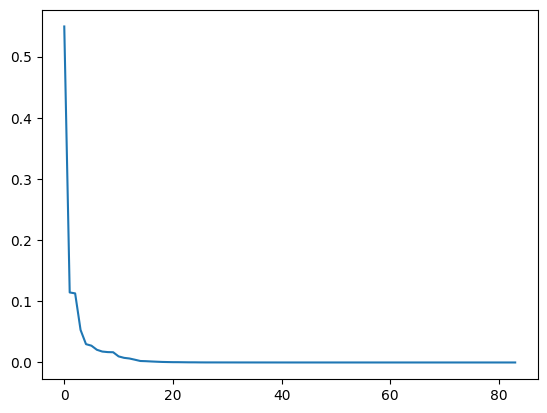

In [5]:
# Make a scree plot
import matplotlib.pyplot as plt
plt.plot(mypca.explained_variance_ratio_)
plt.show()


## Listing 16-5. Fitting the PCA with 10 components

In [6]:
mypca = PCA(10)
df = mypca.fit_transform(df)


## Listing 16-6. Train test split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)


## Listing 16-7. Specify the model and its architecture

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random
random.seed(42)

simple_model = Sequential([
  Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
  Dense(64, activation='relu'),
  Dense(1),
])


c:\Users\ALBER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Listing 16-8. Obtain a summary of the model architecture

In [9]:
simple_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,929 (19.25 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 0 (0.00 B)

## Listing 16-9. Compile the model

In [10]:
simple_model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)


## Listing 16-10. Fit the model

In [11]:
smod_history = simple_model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=10,
          batch_size=32,
          shuffle = True
)


Epoch 1/10
7042/7042 ━━━━━━━━━━━━━━━━━━━━ 7s 822us/step - loss: 2.7415 - mean_absolute_error: 2.7415 - val_loss: 2.5448 - val_mean_absolute_error: 2.5448
Epoch 2/10
7042/7042 ━━━━━━━━━━━━━━━━━━━━ 5s 742us/step - loss: 2.4981 - mean_absolute_error: 2.4981 - val_loss: 2.4689 - val_mean_absolute_error: 2.4689
Epoch 3/10
7042/7042 ━━━━━━━━━━━━━━━━━━━━ 5s 736us/step - loss: 2.4718 - mean_absolute_error: 2.4718 - val_loss: 2.4451 - val_mean_absolute_error: 2.4451
Epoch 4/10
7042/7042 ━━━━━━━━━━━━━━━━━━━━ 6s 797us/step - loss: 2.4352 - mean_absolute_error: 2.4352 - val_loss: 2.4516 - val_mean_absolute_error: 2.4516
Epoch 5/10
7042/7042 ━━━━━━━━━━━━━━━━━━━━ 5s 772us/step - loss: 2.4190 - mean_absolute_error: 2.4190 - val_loss: 2.5732 - val_mean_absolute_error: 2.5732
Epoch 6/10
7042/7042 ━━━━━━━━━━━━━━━━━━━━ 6s 809us/step - loss: 2.4144 - mean_absolute_error: 2.4144 - val_loss: 2.4511 - val_mean_absolute_error: 2.4511
Epoch 7/10
7042/7042 ━━━━━━━━━━━━━━━━━━━━ 7s 954us/step - loss: 2.4127 - mea

## Listing 16-11. Plot the training history

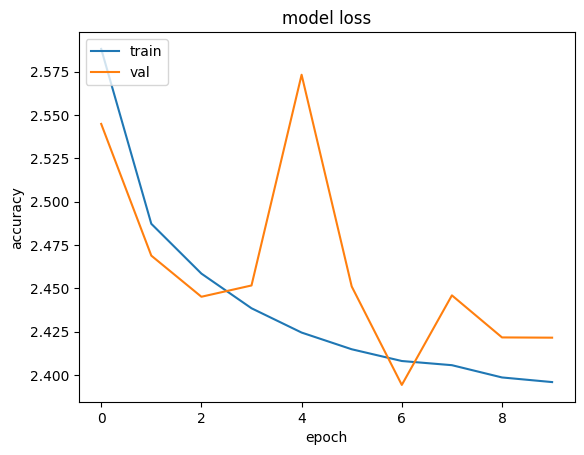

In [12]:
plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


## Listing 16-12. A better architecture

Epoch 1/100


c:\Users\ALBER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7042/7042 ━━━━━━━━━━━━━━━━━━━━ 60s 8ms/step - loss: 2.9987 - mean_absolute_error: 2.9987 - val_loss: 2.5017 - val_mean_absolute_error: 2.5017
Epoch 2/100
7042/7042 ━━━━━━━━━━━━━━━━━━━━ 53s 7ms/step - loss: 2.5115 - mean_absolute_error: 2.5115 - val_loss: 2.4055 - val_mean_absolute_error: 2.4055
Epoch 3/100
7042/7042 ━━━━━━━━━━━━━━━━━━━━ 53s 8ms/step - loss: 2.4208 - mean_absolute_error: 2.4208 - val_loss: 2.4261 - val_mean_absolute_error: 2.4261
Epoch 4/100
7042/7042 ━━━━━━━━━━━━━━━━━━━━ 54s 8ms/step - loss: 2.3682 - mean_absolute_error: 2.3682 - val_loss: 2.3452 - val_mean_absolute_error: 2.3452
Epoch 5/100
7042/7042 ━━━━━━━━━━━━━━━━━━━━ 51s 7ms/step - loss: 2.3265 - mean_absolute_error: 2.3265 - val_loss: 2.3615 - val_mean_absolute_error: 2.3615
Epoch 6/100
7042/7042 ━━━━━━━━━━━━━━━━━━━━ 52s 7ms/step - loss: 2.2920 - mean_absolute_error: 2.2920 - val_loss: 2.3304 - val_mean_absolute_error: 2.3304
Epoch 7/100
7042/7042 ━━━━━━━━━━━━━━━━━━━━ 53s 8ms/step - loss: 2.2567 - mean_absolute_e

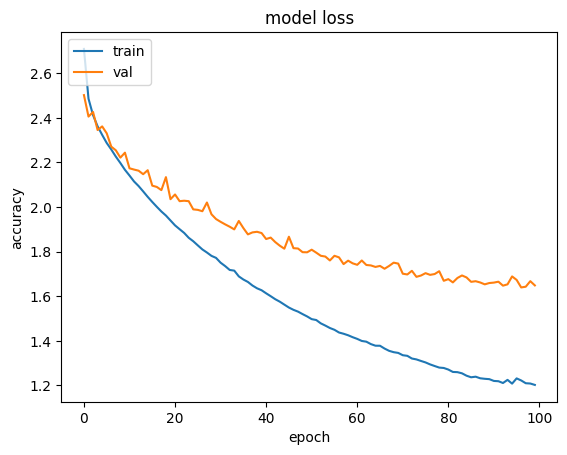

4336/4336 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step


NameError: name 'r2_score' is not defined

In [13]:
random.seed(42)
model = Sequential([
  Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(1), ])
model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

history = model.fit(X_train, y_train,
          #validation_data=(X_test, y_test),
          validation_split=0.2,
          epochs=100,
          batch_size=32,
          shuffle = True
)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

preds = model.predict(X_test)
print(r2_score(preds, y_test))



In [14]:
from sklearn.metrics import r2_score
print(r2_score(preds, y_test))

0.9117566231424516


# Chapter 17 - RNNs using SimpleRNN and GRU

## Listing 17-1. Importing the data

In [15]:
import keras
import pandas as pd

from zipfile import ZipFile
import os

uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall()
csv_path = "jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)
del zip_file


## Listing 17-2. Keep only temperature data


In [16]:
df = df[['T (degC)']]


## Listing 17-3. Apply a MinMaxScaler

In [17]:
# apply a min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = ['T'])


## Listing 17-4. Preparing the sequence data

In [18]:
ylist = list(df['T'])

n_future = 72
n_past = 3*72
total_period = 4*72

idx_end = len(ylist)
idx_start = idx_end - total_period

X_new = []
y_new = []
while idx_start > 0:
  x_line = ylist[idx_start:idx_start+n_past]
  y_line = ylist[idx_start+n_past:idx_start+total_period]

  X_new.append(x_line)
  y_new.append(y_line)

  idx_start = idx_start - 1

# converting list of lists to numpy array
import numpy as np
X_new = np.array(X_new)
y_new = np.array(y_new)


## Listing 17-5. Splitting train and test

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=42)


## Listing 17-6. Reshape the data to be recognized by keras

In [20]:
batch_size = 32

n_samples = X_train.shape[0]
n_timesteps = X_train.shape[1]
n_steps = y_train.shape[1]
n_features = 1

X_train_rs = X_train.reshape(n_samples, n_timesteps, n_features )

X_test_rs = X_test.reshape(X_test.shape[0], n_timesteps, n_features )


## Listing 17-7. Parametetrize a small network with SimpleRNN

c:\Users\ALBER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 72)             │           648 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 728 (2.84 KB)

 Trainable params: 728 (2.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 99s 14ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - val_loss: 0.0462 - val_mean_absolute_error: 0.0462
Epoch 2/5
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 100s 14ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - val_loss: 0.0451 - val_mean_absolute_error: 0.0451
Epoch 3/5
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 110s 16ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - val_loss: 0.0445 - val_mean_absolute_error: 0.0445
Epoch 4/5
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 110s 16ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - val_loss: 0.0433 - val_mean_absolute_error: 0.0433
Epoch 5/5
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 97s 14ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - val_loss: 0.0473 - val_mean_absolute_error: 0.0473
4334/4334 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step
0.6508219079172867


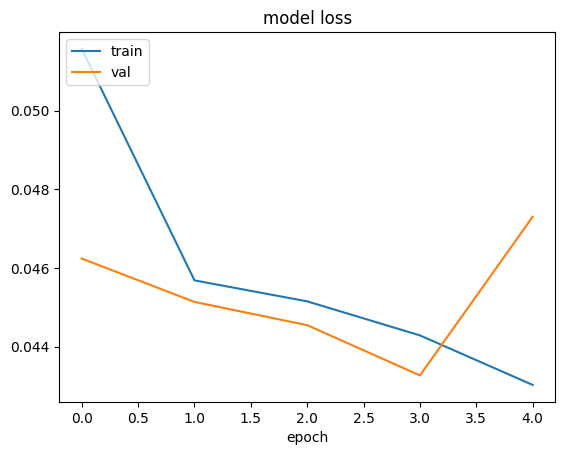

In [21]:
import random
random.seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

simple_model = Sequential([
  SimpleRNN(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train.shape[1]),
])


simple_model.summary()

simple_model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)

from sklearn.metrics import r2_score
print(r2_score(preds, y_test))

import matplotlib.pyplot as plt
plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


## Listing 17-8. A more complex network with three layers of SimpleRNN

c:\Users\ALBER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 216, 32)        │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 216, 32)        │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 72)             │         2,376 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,624 (29.78 KB)

 Trainable params: 7,624 (29.78 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 422s 59ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - val_loss: 0.0342 - val_mean_absolute_error: 0.0342
Epoch 2/5
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 421s 60ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - val_loss: 0.0305 - val_mean_absolute_error: 0.0305
Epoch 3/5
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 404s 57ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - val_loss: 0.0341 - val_mean_absolute_error: 0.0341
Epoch 4/5
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 408s 58ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - val_loss: 0.0370 - val_mean_absolute_error: 0.0370
Epoch 5/5
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 401s 57ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - val_loss: 0.0293 - val_mean_absolute_error: 0.0293
4334/4334 ━━━━━━━━━━━━━━━━━━━━ 64s 15ms/step
0.8972662058502296


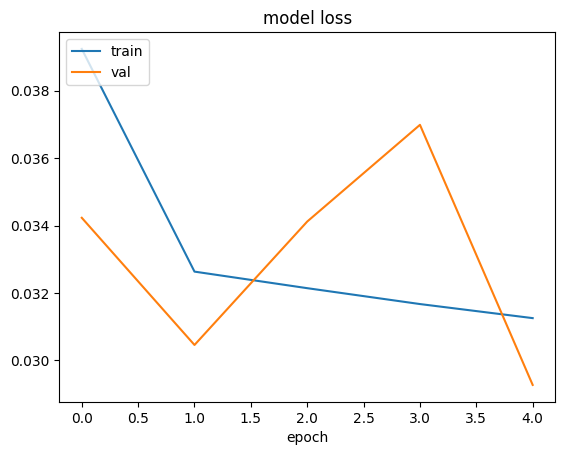

In [22]:
random.seed(42)

simple_model = Sequential([
  SimpleRNN(32, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
  SimpleRNN(32, activation='tanh', return_sequences = True),
  SimpleRNN(32, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)

print(r2_score(preds, y_test))

plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


## Listing 17-9. A simple architecture with 1 GRU layer

c:\Users\ALBER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 72)             │           648 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 912 (3.56 KB)

 Trainable params: 912 (3.56 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 282s 40ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - val_loss: 0.0422 - val_mean_absolute_error: 0.0422
Epoch 2/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 280s 40ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - val_loss: 0.0287 - val_mean_absolute_error: 0.0287
Epoch 3/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 275s 39ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - val_loss: 0.0287 - val_mean_absolute_error: 0.0287
Epoch 4/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 279s 40ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - val_loss: 0.0274 - val_mean_absolute_error: 0.0274
Epoch 5/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 288s 41ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - val_loss: 0.0477 - val_mean_absolute_error: 0.0477
Epoch 6/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 309s 44ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - val_loss: 0.0450 - val_mean_absolute_error: 0.0450
Epoch 7/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 312s 44ms/step - loss: 0.045

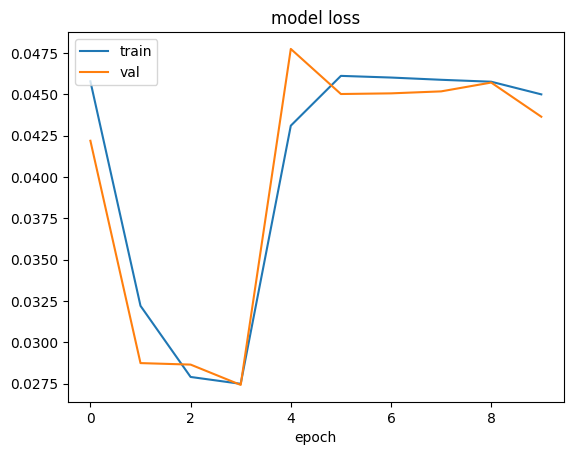

In [23]:
random.seed(42)
from tensorflow.keras.layers import GRU

simple_model = Sequential([
   GRU(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=10,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)

print(r2_score(preds, y_test))

plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


## Listing 17-10. A more complex network with three layers of GRU

In [ ]:
random.seed(42)

simple_model = Sequential([
   GRU(64, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    GRU(64, activation='tanh', return_sequences=True),
    GRU(64, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=10,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)

print(r2_score(preds, y_test))

plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# Chapter 18 - LSTMs

## Listing 18-1.Importing the weather data

In [25]:
import keras
import pandas as pd

from zipfile import ZipFile
import os

uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall()
csv_path = "jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)
del zip_file


# retain only temperature
df = df[['T (degC)']]

# apply a min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = ['T'])

# convert to windowed data sets
ylist = list(df['T'])

n_future = 72
n_past = 3*72
total_period = 4*72

idx_end = len(ylist)
idx_start = idx_end - total_period

X_new = []
y_new = []
while idx_start > 0:
  x_line = ylist[idx_start:idx_start+n_past]
  y_line = ylist[idx_start+n_past:idx_start+total_period]

  X_new.append(x_line)
  y_new.append(y_line)

  idx_start = idx_start - 1

import numpy as np
X_new = np.array(X_new)
y_new = np.array(y_new)

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=42)

# reshape data into the right format for RNNs
n_samples = X_train.shape[0]
n_timesteps = X_train.shape[1]
n_steps = y_train.shape[1]
n_features = 1

X_train_rs = X_train.reshape(n_samples, n_timesteps, n_features )
X_test_rs = X_test.reshape(X_test.shape[0], n_timesteps, n_features )



## Listing 18-2.One-layer LSTM

In [26]:
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
random.seed(42)

batch_size = 32
simple_model = Sequential([
   LSTM(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)

print(r2_score(preds, y_test))

plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


c:\Users\ALBER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 8)              │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 72)             │           648 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 968 (3.78 KB)

 Trainable params: 968 (3.78 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 251s 35ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - val_loss: 0.0297 - val_mean_absolute_error: 0.0297
Epoch 2/5
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 292s 42ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - val_loss: 0.0275 - val_mean_absolute_error: 0.0275
Epoch 3/5
7039/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0276 - mean_absolute_error: 0.0276

## Listing 18-3.Three-layer LSTM

In [ ]:
random.seed(42)

simple_model = Sequential([
   LSTM(64, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    LSTM(64, activation='tanh', return_sequences=True),
    LSTM(64, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=10,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)

print(r2_score(preds, y_test))

plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# Chapter 19 - Facebook's Prophet

## Listing 19-1. Preparing the dependent variable

In [ ]:
import pandas as pd
y = pd.read_csv('air_visit_data.csv.zip')
y = y.pivot(index='visit_date', columns='air_store_id')['visitors']
y = y.fillna(0)
y = pd.DataFrame(y.sum(axis=1))


## Listing 19-2. Preparing the modeling data frame

In [ ]:
y = y.reset_index(drop=False)
y.columns = ['ds', 'y']


## Listing 19-3. Creating a train-test split

In [ ]:
train = y.iloc[:450,:]
test = y.iloc[450:,:]


## Listing 19-4. Creating a basic Prophet model

In [ ]:
from fbprophet import Prophet
m = Prophet()
m.fit(train)


## Listing 19-5. Creating a basic Prophet model

In [ ]:
future = m.make_future_dataframe(periods=len(test))
forecast = m.predict(future)


## Listing 19-6. Creating a basic Prophet model

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(list(test['y']), list(forecast.loc[450:,'yhat'] )))


## Listing 19-7. Plotting the fit of the model

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(test['y']))
plt.plot(list(forecast.loc[450:,'yhat'] ))
plt.show()


## Listing 19-8. Creating a Prophet forecast plot

In [ ]:
fig1 = m.plot(forecast)
plt.show()


## Listing 19-9. Creating a Prophet decomposition plot

In [ ]:
fig2 = m.plot_components(forecast)
plt.show()


## Listing 19-10. Add montly seasonality to the plot

In [ ]:
m2 = Prophet()
m2.add_seasonality(name='monthly', period=30.5, fourier_order=5)

m2.fit(train)

future2 = m2.make_future_dataframe(periods=len(test))
forecast2 = m2.predict(future)
print(r2_score(list(test['y']), list(forecast2.loc[450:,'yhat'] )))

fig2 = m2.plot_components(forecast2)
plt.show()


## Listing 19-11. Prepare holidays data

In [ ]:
holidays = pd.read_csv('date_info.csv.zip')
holidays = holidays[holidays['holiday_flg'] == 1]
holidays = holidays[['calendar_date', 'holiday_flg']]
holidays = holidays.drop(['holiday_flg'], axis=1)
holidays['holiday'] = 'holiday'
holidays.columns = ['ds', 'holiday']


## Listing 19-12. Add holidays to the model

In [ ]:
m3 = Prophet(holidays=holidays)
m3.fit(train)
future3 = m3.make_future_dataframe(periods=len(test))
forecast3 = m3.predict(future)

print(r2_score(list(test['y']), list(forecast3.loc[450:,'yhat'] )))

fig2 = m3.plot_components(forecast3)
plt.show()


## Listing 19-13. Add reservations to the model

In [ ]:
X_reservations = pd.read_csv('air_reserve.csv.zip')
X_reservations['visit_date'] = pd.to_datetime(X_reservations['visit_datetime']).dt.date
X_reservations = pd.DataFrame(X_reservations.groupby('visit_date')['reserve_visitors'].sum())
X_reservations = X_reservations.reset_index(drop = False)
train4 = train.copy()
train4['ds'] = pd.to_datetime(train4['ds']).dt.date
train4 = train4.merge(X_reservations, left_on = 'ds', right_on = 'visit_date', how = 'left')[['ds', 'y', 'reserve_visitors']].fillna(0)


## Listing 19-14. Add reservations to the model

In [ ]:
m4 = Prophet()
m4.add_regressor('reserve_visitors')
m4.fit(train4)
future4 = m4.make_future_dataframe(periods=len(test))
future4['ds'] = pd.to_datetime(future4['ds']).dt.date

future4 = future4.merge(X_reservations, left_on = 'ds', right_on = 'visit_date', how = 'left')[['ds', 'reserve_visitors']].fillna(0)

forecast4 = m4.predict(future4)

print(r2_score(list(test['y']), list(forecast4.loc[450:,'yhat'] )))

plt.plot(list(test['y']))
plt.plot(list(forecast4.loc[450:,'yhat'] ))

fig2 = m4.plot_components(forecast4)
plt.show()


## Listing 19-15. Grid Searching the Prophet

In [ ]:
def model_test(holidays, weekly_seasonality,
yearly_seasonality, add_monthly, add_reserve, changepoint_prior_scale, holidays_prior_scale, month_fourier):
    
    m4 = Prophet(
yearly_seasonality=yearly_seasonality, 
weekly_seasonality=weekly_seasonality, 
holidays=holidays, 
changepoint_prior_scale=changepoint_prior_scale, 
holidays_prior_scale=holidays_prior_scale)
    
    if add_monthly:    
        m4.add_seasonality(
name='monthly', 
period=30.5, 
fourier_order=month_fourier)
    
    if add_reserve:
        m4.add_regressor('reserve_visitors')

    m4.fit(train4)

    future4 = m4.make_future_dataframe(periods=len(test))

    future4['ds'] = pd.to_datetime(future4['ds']).dt.date
    
    if add_reserve:
        future4 = future4.merge(
X_reservations, 
left_on = 'ds', 
right_on = 'visit_date', 
how = 'left')
   future4 = future4[['ds', 'reserve_visitors']]
   future4 = future4.fillna(0)

    forecast4 = m4.predict(future4)

    return r2_score(
list(test['y']),
list(forecast4.loc[450:,'yhat'] )) 
# Setting the grid
holidays_opt = [holidays, None]
weekly_seas = [ 5, 10, 30, 50]
yearly_seas = [ 5, 10, 30, 50]
add_monthly = [True, False]
add_reserve = [True, False]
changepoint_prior_scale = [0.1, 0.3, 0.5]
holidays_prior_scale = [0.1, 0.3, 0.5]
month_fourier = [5, 10, 30, 50]

# Looping through the grid
grid_results = []
for h in holidays_opt:
  for w in weekly_seas:
    for ys in yearly_seas:
      for m in add_monthly:
        for r in add_reserve:
           for c in changepoint_prior_scale:
             for hp in holidays_prior_scale:
               for mf in month_fourier:
                  r2=model_test(h,w,ys,m,r,c,hp,mf)
                  print([w,ys,m,r,c,hp,mf,r2])
                  grid_results.append([h,w,ys,m,r,c,hp,mf,r2])

# adding it all to a dataframe and extract the best model
benchmark = pd.DataFrame(grid_results)
benchmark = benchmark.sort_values(8, ascending=False)

h, w,ys, m, r, c,hp,mf,r2 = list(benchmark.iloc[0,:])

# Fit the Prophet with those best hyperparameters
m4 = Prophet(
yearly_seasonality=ys, 
weekly_seasonality=w, 
holidays=h, 
changepoint_prior_scale=c, 
holidays_prior_scale=hp)
    
if m:    
    m4.add_seasonality(
name='monthly', 
period=30.5, 
fourier_order=mf)

if r:
    m4.add_regressor('reserve_visitors')

m4.fit(train4)

future4 = m4.make_future_dataframe(periods=len(test))

future4['ds'] = pd.to_datetime(future4['ds']).dt.date

if r:
    future4 = future4.merge(
X_reservations, 
left_on = 'ds', 
right_on = 'visit_date', 
how = 'left')
    future4 = future4[['ds', 'reserve_visitors']]
    future4 = future4.fillna(0)

forecast4 = m4.predict(future4)


# Chapter 20 - Amazon's DeepAR

## Listing 20-1. Importing the data

In [ ]:
import pandas as pd
y = pd.read_csv('air_visit_data.csv.zip')
y = y.pivot(index='visit_date', columns='air_store_id')['visitors']
y = y.fillna(0)
y = pd.DataFrame(y.sum(axis=1))

y = y.reset_index(drop=False)
y.columns = ['date', 'y']


## Listing 20-2. Preparing the data format requered by the gluonts library

In [ ]:
from gluonts.dataset.common import ListDataset
start = pd.Timestamp("01-01-2016", freq="H")
# train dataset: cut the last window of length "prediction_length", add "target" and "start" fields
train_ds = ListDataset([{'target': y.loc[:450,'y'], 'start': start}], freq='H')
# test dataset: use the whole dataset, add "target" and "start" fields
test_ds = ListDataset([{'target': y['y'], 'start': start}],freq='H')


## Listing 20-3. Fitting the default DeepAR model

In [ ]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer
import mxnet as mx
import numpy as np

np.random.seed(7)
mx.random.seed(7)

estimator = DeepAREstimator(
    prediction_length=28,
    context_length=100,
    freq=’H’,
    trainer=Trainer(ctx="gpu", # remove if running on windows
                    epochs=5,
                    learning_rate=1e-3,
                    num_batches_per_epoch=100
                   )
)

predictor = estimator.train(train_ds)


## Listing 20-4. Prediction

In [ ]:
predictions = predictor.predict(test_ds)
predictions = list(predictions)[0]
predictions = predictions.quantile(0.5)


## Listing 20-5. R2 score and prediction graph

In [ ]:
from sklearn.metrics import r2_score
print(r2_score( list(test_ds)[0]['target'][-28:], predictions))

import matplotlib.pyplot as plt
plt.plot(predictions)
plt.plot(list(test_ds)[0]['target'][-28:])
plt.legend(['predictions', 'actuals'])
plt.show()


## Listing 20-6. Probability forecast graph

In [ ]:
from gluonts.evaluation.backtest import make_evaluation_predictions

forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

forecasts = list(forecast_it)
tss = list(ts_it)

ts_entry = tss[0]
forecast_entry = forecasts[0]

def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 150
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

plot_prob_forecasts(ts_entry, forecast_entry)
plt.show()


## Listing 20-7. Preparing holidays and reservations data and adding them into the ListDataset

In [ ]:
X_reservations = pd.read_csv('air_reserve.csv.zip')
X_reservations['visit_date'] = pd.to_datetime(X_reservations['visit_datetime']).dt.date
X_reservations = pd.DataFrame(X_reservations.groupby('visit_date')['reserve_visitors'].sum())
X_reservations = X_reservations.reset_index(drop = False)

# Convert to datatime for merging correctly
y.date = pd.to_datetime(y.date)
X_reservations.visit_date = pd.to_datetime(X_reservations.visit_date)

# Merging and filling missing dates with 0
y = y.merge(X_reservations, left_on = 'date', right_on =  'visit_date', how = 'left').fillna(0)

# Preparing and merging holidays data
holidays = pd.read_csv('date_info.csv.zip')
holidays.calendar_date = pd.to_datetime(holidays.calendar_date)
y = y.merge(holidays, left_on = 'date', right_on = 'calendar_date', how = 'left').fillna(0)

# Preparing the ListDatasets

train_ds = ListDataset([{
    'target': y.loc[:450,'y'],
    'start': start,
    'feat_dynamic_real': y.loc[:450,['reserve_visitors', 'holiday_flg']].values
    }], freq='H')

test_ds = ListDataset([{
    'target': y['y'], 
    'start': start, 
    'feat_dynamic_real': y.loc[:,['reserve_visitors', 'holiday_flg']].values
    }],freq='H')


## Listing 20-8. Same code for fitting a different model: this model contains the two additional regressors

In [ ]:
np.random.seed(7)
mx.random.seed(7)

# Build and fit model
estimator = DeepAREstimator(
    prediction_length=28,
    context_length=100,
    freq='H',
    trainer=Trainer(ctx="gpu", # remove if running on windows
                    epochs=5,
                    learning_rate=1e-3,
                    num_batches_per_epoch=100
                   )
)

predictor = estimator.train(train_ds)

# Make Predictions
predictions = predictor.predict(test_ds)
predictions = list(predictions)[0]
predictions = predictions.quantile(0.5)

# Compute and print R2 score
print(r2_score( list(test_ds)[0]['target'][-28:], predictions))


## Listing 20-9. Tuning the hyperparameters

In [ ]:
np.random.seed(7)
mx.random.seed(7)

results = []

for learning_rate in [1e-4, 1e-2]:
  for num_layers in [2, 5]:
    for num_cells in [30, 100]:

      estimator = DeepAREstimator(
          prediction_length=28,
          freq=’H’,
          trainer=Trainer(ctx="gpu", # remove if on Windows
                          epochs=10,
                          learning_rate=learning_rate,
                          num_batches_per_epoch=100
                        ),
          num_layers = num_layers,
          num_cells = num_cells,
      )

      predictor = estimator.train(train_ds)

      predictions = predictor.predict(test_ds)

      r2 = r2_score(list(predictions)[0].quantile(0.5), list(test_ds)[0]['target'][-28:])
      result = [learning_rate, num_layers, num_cells, r2]
      print(result)
      results.append(result)
